## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Read data

In [2]:
df = pd.read_csv('input/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Compute pairwise correlation of columns

<AxesSubplot:>

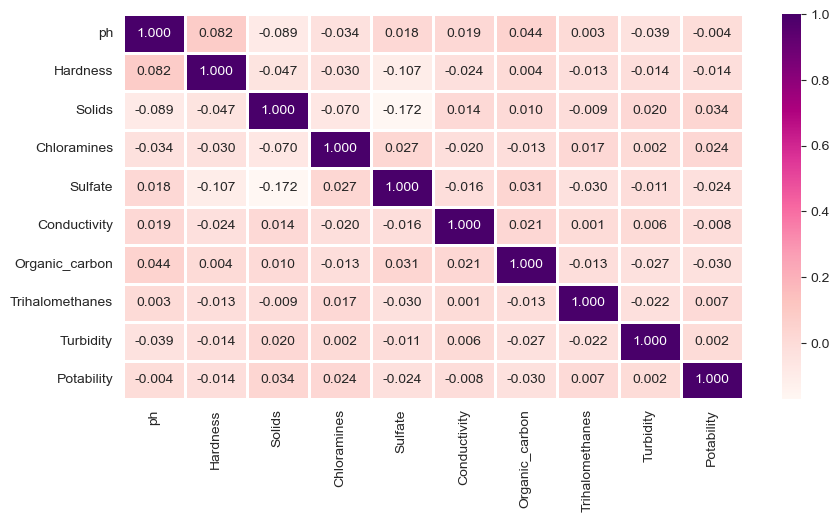

In [3]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True, cmap="RdPu",fmt='.3f',linewidths=.8)

## Count of duplicated values

In [4]:
dup = df.duplicated().sum()
print('Any Duplicate Value:',dup)

Any Duplicate Value: 0


## Count of NaN values

In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## Filling NaN objects with mean

In [6]:
df["ph"].fillna(value = df["ph"].mean(), inplace = True)
df["Sulfate"].fillna(value = df["Sulfate"].mean(), inplace = True)
df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].mean(), inplace = True)

# df.fillna(df.mean())

## Count of NaN values after filling

In [7]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [8]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Histogram of potability

<AxesSubplot:xlabel='Potability', ylabel='Count'>

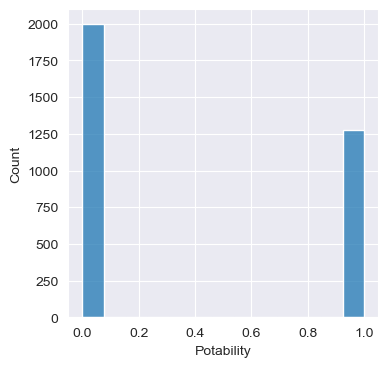

In [9]:
plt.rcParams['figure.figsize'] = [4,4]
sns.histplot(df['Potability'])

## Pairwise relationship in dataset

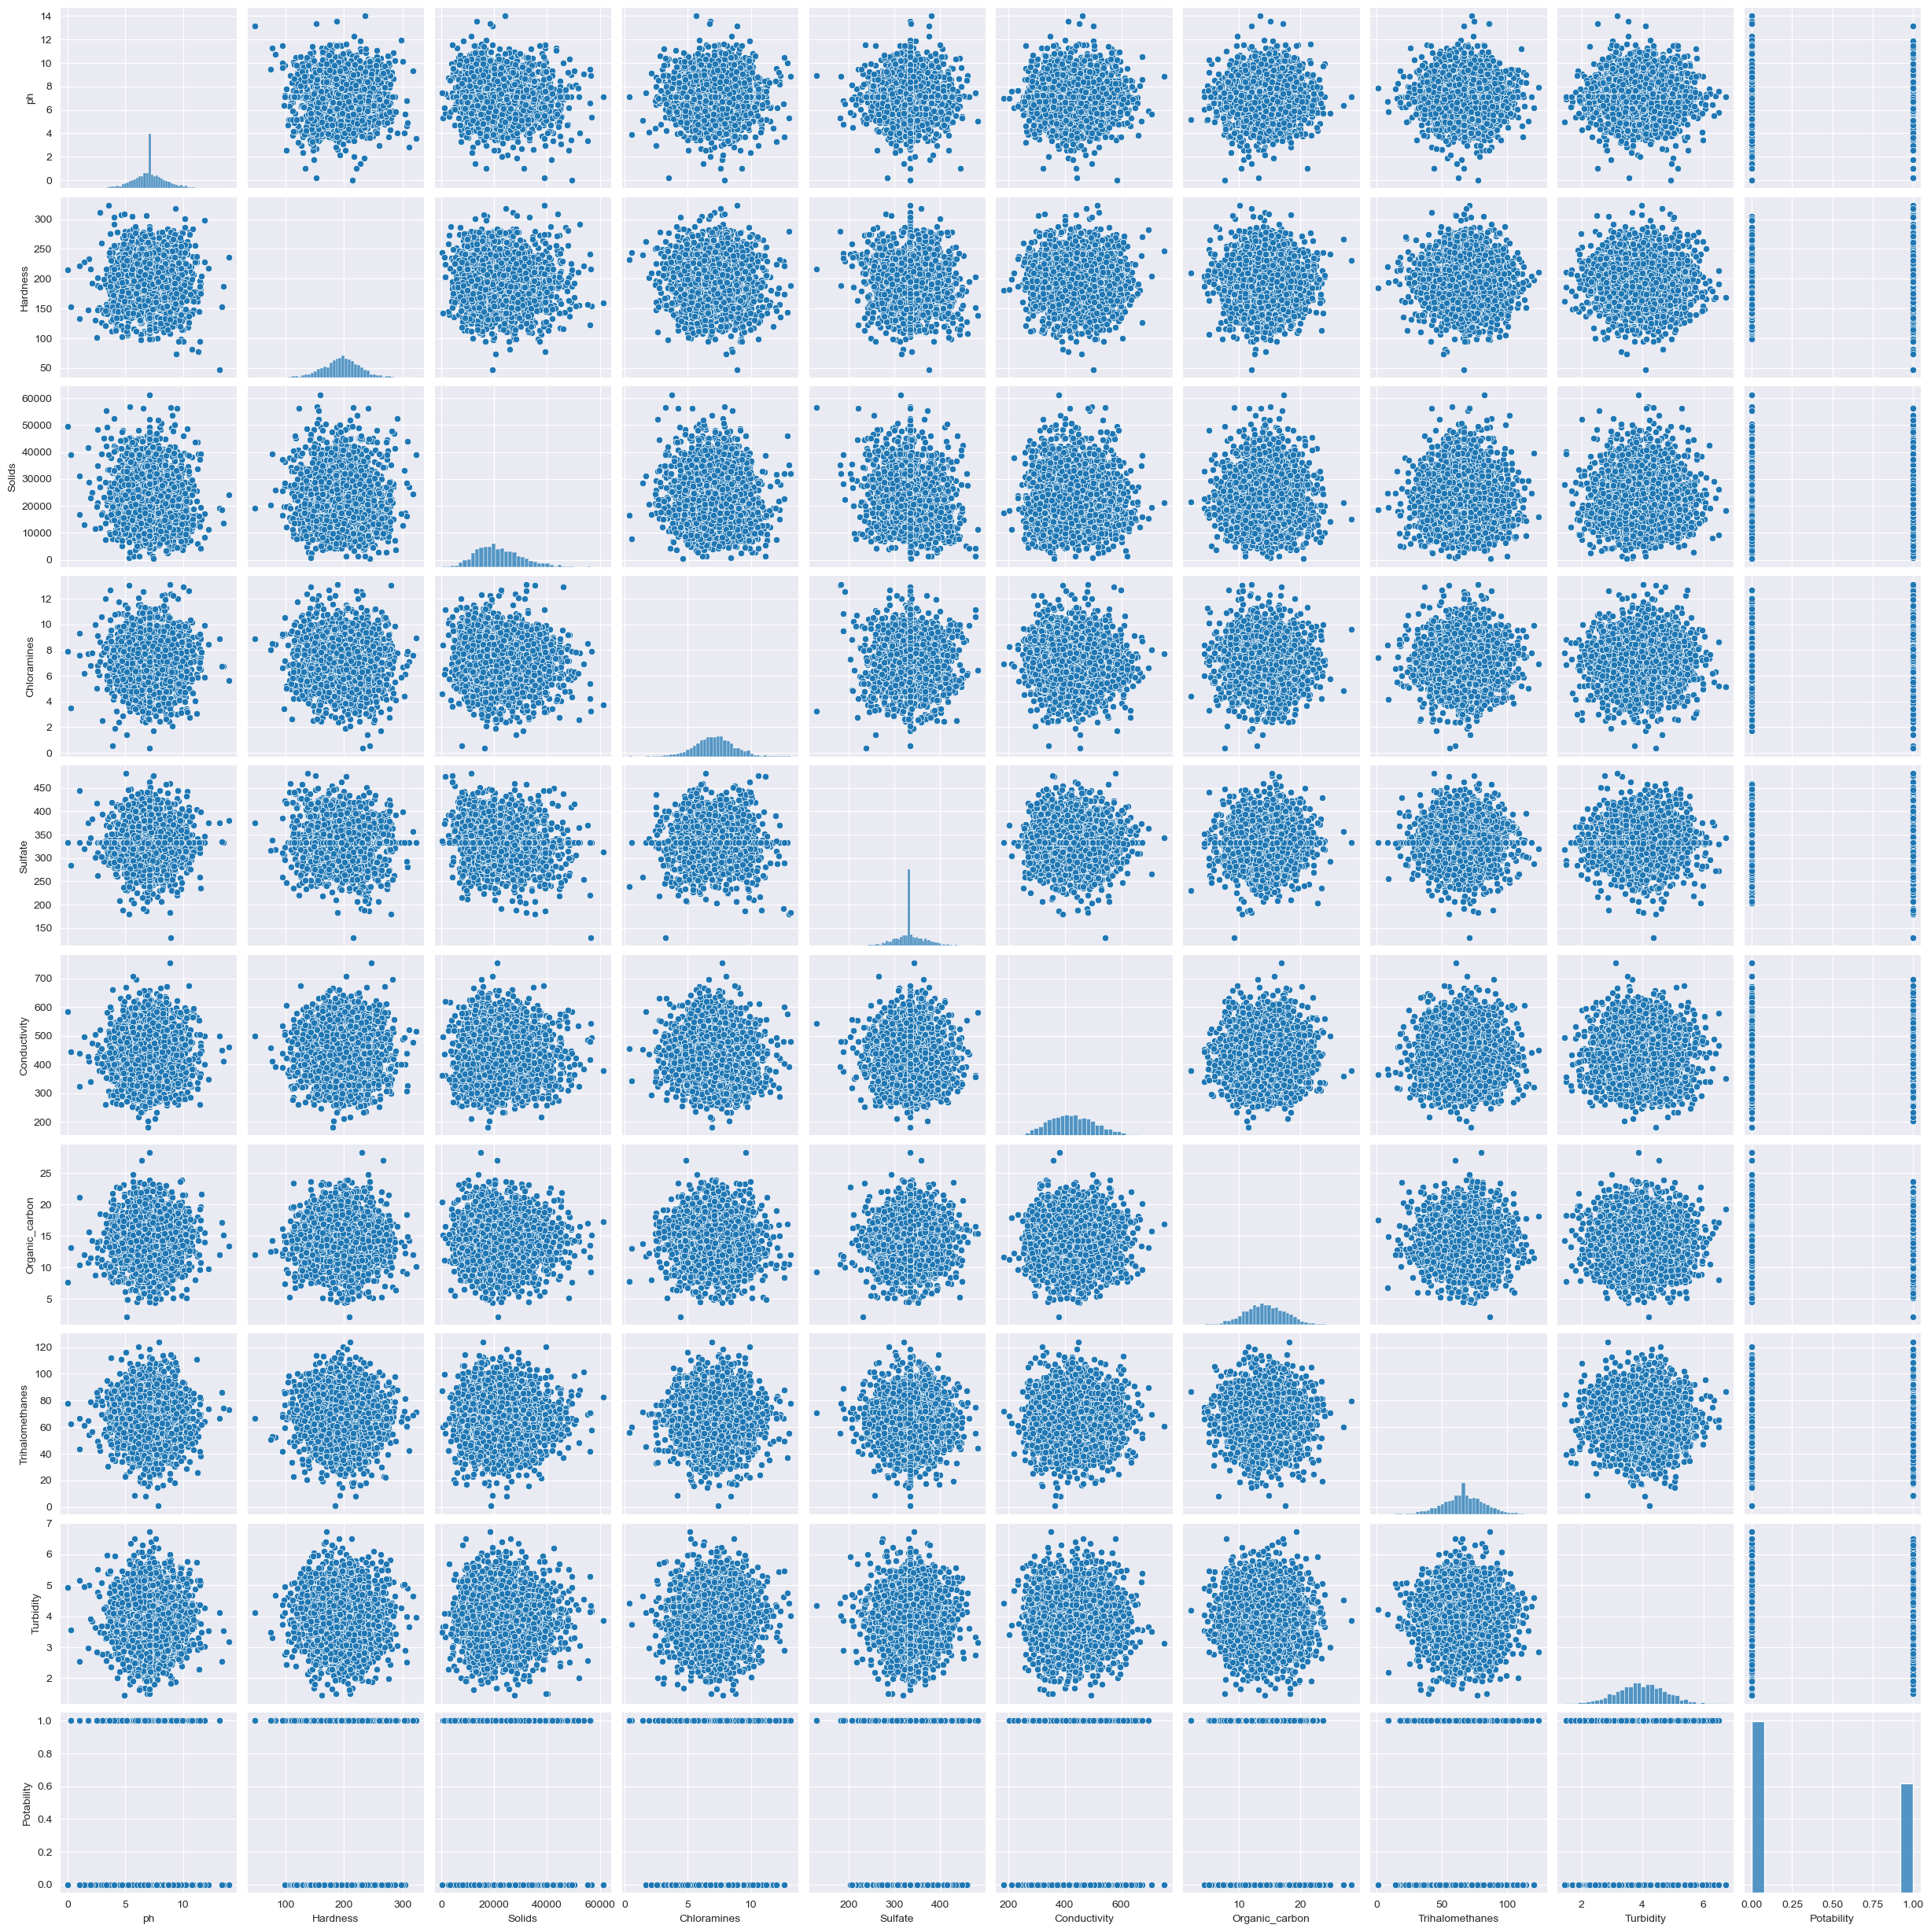

In [10]:
sns.pairplot(data = df)

## Split dataset into train and test data

In [11]:
x = df.drop(['Potability'],axis=True)
y = df['Potability']

x_train,x_test,y_train,y_test = tts(x,y,test_size=0.5, random_state = 10)

In [12]:
print(x.describe())
print("\n\n")
print(y.describe())

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  
count   3276.000000     3276.000000      3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786  
std       80.824064        3.308162        15.769881     0.780382  
min      181.483754        2.200000         0.738000

## Random Forest Classifier

In [13]:
RFC = RandomForestClassifier()
# Build a forest of trees from the training set
RFC.fit(x_train,y_train)
# Predict classes
y_RFC = RFC.predict(x_test)

In [14]:
Acc_rfc = accuracy_score(y_test, y_RFC, normalize=False)
Acc_rfc_norm = accuracy_score(y_test, y_RFC)
print("Predicted:", Acc_rfc, "from", len(y_test))
print(f'Accuracy: {Acc_rfc_norm*100:.2f}%')

Predicted: 1113 from 1638
Accuracy: 67.95%


In [15]:
print(classification_report(y_RFC,y_test))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      1285
           1       0.36      0.63      0.46       353

    accuracy                           0.68      1638
   macro avg       0.62      0.66      0.62      1638
weighted avg       0.76      0.68      0.70      1638



<AxesSubplot:>

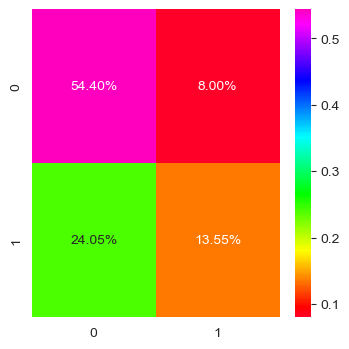

In [28]:
cmr = confusion_matrix(y_test, y_RFC)
sns.heatmap(cmr/np.sum(cmr), annot=True, fmt='0.2%', cmap='gist_rainbow')

## MLP Classifier

In [21]:
MLP = MLPClassifier(alpha=1, max_iter=1000)
MLP.fit(x_train, y_train)
y_MLP = MLP.predict(x_test)

In [22]:
Acc_mlp = accuracy_score(y_test, y_MLP, normalize=False)
Acc_mlp_norm = accuracy_score(y_test, y_MLP)
print("Predicted:", Acc_mlp, "from", len(y_test))
print(f'Accuracy: {Acc_mlp_norm*100:.2f}%')

Predicted: 1023 from 1638
Accuracy: 62.45%


In [23]:
print(classification_report(y_MLP,y_test))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77      1635
           1       0.00      0.67      0.01         3

    accuracy                           0.62      1638
   macro avg       0.50      0.65      0.39      1638
weighted avg       1.00      0.62      0.77      1638



<AxesSubplot:>

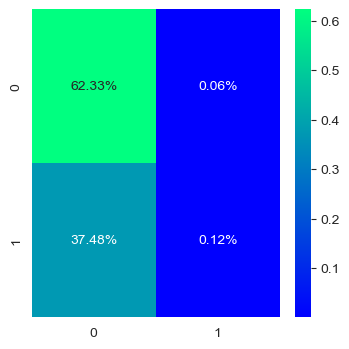

In [37]:
cmr = confusion_matrix(y_test, y_MLP)
sns.heatmap(cmr/np.sum(cmr), annot=True, fmt='0.2%', cmap='winter')